In [1]:
import numpy as np
from matplotlib import pyplot as plt
np.set_printoptions(precision=3)

# Phần 2. Một số phân tích mô tả đơn biến cơ bản

**Lưu ý: các phân tích trong phần này thực hiện trên dữ liệu có phân bố chuẩn**

[[12.663 11.431  6.909  9.983 11.243  8.56  10.531 10.217 10.009  9.651
  10.866 12.406  8.07  12.057 10.457 10.89   7.727 10.27  12.969  7.84 ]
 [ 6.045  6.513 10.532 14.77  12.247 13.345 10.198 12.796  9.458 11.226
   9.465  8.901 10.265  9.048 12.617 10.39  10.8    9.325 12.513  8.536]
 [11.32   9.298  8.121  9.021  8.391  9.575  9.322 10.624 11.13   9.705
   9.948 10.578  8.92  11.416 11.684 10.407 14.789 11.835  9.775  9.276]
 [ 9.536  8.997 12.258  8.604  9.838  8.941 12.092  7.163  9.275  9.756
  10.639 10.922  9.568 11.978 10.63  14.935  6.983 11.241  7.91   8.404]
 [13.97  13.49   6.288  9.554  9.868  5.737  9.902 10.787 10.435  6.011
  12.215 10.489  9.876  8.492 11.424 11.837  9.036 10.179 11.654  6.091]]


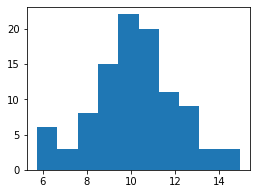

In [2]:
np.random.seed(10)
x = np.random.normal(10, 2, size=(5,20))
print(x)
fig, ax = plt.subplots(figsize=(4,3), num=1)
ax.hist(x.flatten(), bins=10)
plt.show()

## 2.2. Độ đo về khuynh hướng tập trung

In [15]:
mean = np.mean(x)
print(mean)

median = np.median(x)
print(median)

10.158833325873747
10.188736828424759


In [48]:
from scipy import stats
stats.mode(x.flatten())

ModeResult(mode=array([5.737]), count=array([1]))

In [47]:
import statistics
statistics.mode(x.flatten())

12.663173008259037

**==> Các hàm tính mode trên đều dựa vào so sánh bằng và không trả về giá trị mong muốn**

**Vậy cần làm thế nào?**

## 2.3. Độ đo về sự/tính mở rộng (phân tán)

In [3]:
ma  = np.max(x)
mi  = np.min(x)
ran = np.ptp(x)
var = np.var(x)
std = np.std(x)
print(ma)
print(mi)
print(ran)
print(var)
print(std)

14.935302112869206
5.736575783036792
9.198726329832414
3.740661401185398
1.9340789542274115


## 2.4. Độ đo về phân vị

In [4]:
pct = np.percentile(x, [25, 85])
qnt = np.quantile(x, [0.25, 0.75])
print(pct)
print(qnt)

[ 9.032 12.111]
[ 9.032 11.344]


In [5]:
# Confidence Interval: 95%
np.percentile(x, [2.5, 97.5])

array([ 6.067, 14.39 ])

In [13]:
# Confidence Interval: 95%
np.quantile(x, [0.025, 0.975])

array([ 6.067, 14.39 ])

In [16]:
range95 = np.quantile(x, [0.025, 0.975])[1] - mean
# print(u"\u00B1")
sign = u"\u00B1"
print(f"95% là dữ liệu sẽ nằm trong khoảng {mean:.2f} {sign} {range95:.2f}")

95% là dữ liệu sẽ nằm trong khoảng 10.16 ± 4.23


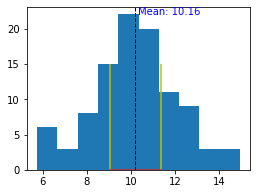

In [17]:
fig, ax = plt.subplots(figsize=(4,3), num=1)
ax.hist(x.flatten(), bins=10)
ylim1, ylim2 = ax.get_ylim()
ax.stem(qnt, [15,15], linefmt='y-', markerfmt=" ")
ax.axvline(mean, color='k', linestyle='dashed', linewidth=1)
ax.text(mean+0.15, ylim2*0.95, f"Mean: {mean:.2f}", color="blue")
plt.show()

In [18]:
from scipy import stats
stats.zscore(x.flatten(), axis=None)

array([ 1.295,  0.658, -1.68 , -0.091,  0.56 , -0.827,  0.192,  0.03 ,
       -0.078, -0.263,  0.366,  1.162, -1.08 ,  0.981,  0.154,  0.378,
       -1.257,  0.058,  1.453, -1.199, -2.127, -1.885,  0.193,  2.384,
        1.08 ,  1.648,  0.02 ,  1.364, -0.363,  0.552, -0.359, -0.65 ,
        0.055, -0.574,  1.271,  0.12 ,  0.332, -0.431,  1.217, -0.839,
        0.601, -0.445, -1.054, -0.588, -0.914, -0.302, -0.433,  0.241,
        0.502, -0.235, -0.109,  0.217, -0.64 ,  0.65 ,  0.789,  0.128,
        2.394,  0.867, -0.198, -0.457, -0.322, -0.601,  1.085, -0.804,
       -0.166, -0.629,  1.   , -1.549, -0.457, -0.208,  0.248,  0.394,
       -0.305,  0.941,  0.243,  2.47 , -1.642,  0.56 , -1.163, -0.907,
        1.971,  1.722, -2.002, -0.312, -0.15 , -2.286, -0.133,  0.325,
        0.143, -2.144,  1.063,  0.171, -0.146, -0.862,  0.654,  0.867,
       -0.581,  0.011,  0.773, -2.103])

In [19]:
# Tìm zscore của 1 giá trị
stats.zmap(scores=12.663, compare=x.flatten())

array([1.295])

In [20]:
stats.zmap(scores=7, compare=x.flatten())

array([-1.633])

## 2.5. Độ đo về dạng phân bố

In [61]:
stats.skew(x.flatten())

0.013640630909285226

In [62]:
stats.kurtosis(x.flatten())

0.12453154540548628

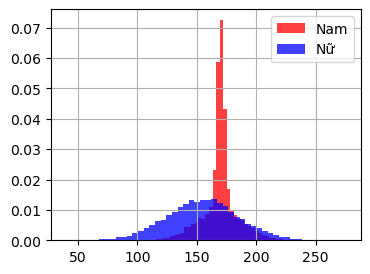

In [120]:
plt.figure(figsize=(4,3))
chieu_cao_nam = np.concatenate([np.random.normal(170, 20, 5000),(np.random.normal(170, 3, 5000))])
plt.hist(chieu_cao_nam, bins=50, facecolor='red', density=True, alpha=0.75)

chieu_cao_nu = np.random.normal(155, 30, 10000)
plt.hist(chieu_cao_nu, bins=50, facecolor='blue', density=True, alpha=0.75)

plt.legend(["Nam", "Nữ"])
plt.grid()
plt.show()

In [119]:
print(stats.kurtosis(chieu_cao_nam))
print(stats.kurtosis(chieu_cao_nu))

2.507599173670723
-0.02762404294317644


# Phần 3. Một số phân tích mô tả đa biến cơ bản

In [17]:
ds_gio_choi_game = np.array([1,2,3,4,5,6,7,8,9,10])
ds_diem_thi = [9,10,7,7,8,4,5,3,4,1]

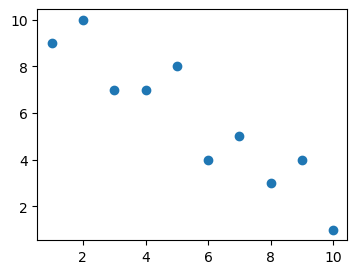

In [10]:
fig, ax = plt.subplots(figsize=(4,3), num=1)
ax.scatter(ds_gio_choi_game, ds_diem_thi)
plt.show()

In [23]:
covariance = np.cov(ds_gio_choi_game, ds_diem_thi, bias=True)
print(covariance)

[[ 8.25 -7.2 ]
 [-7.2   7.36]]


In [18]:
print(np.var(ds_gio_choi_game))
print(np.var(ds_diem_thi))

8.25
7.360000000000001


In [28]:
coeff = np.corrcoef(ds_gio_choi_game, ds_diem_thi)
print(coeff)

[[ 1.        -0.9239886]
 [-0.9239886  1.       ]]


## Tìm fitting line

In [37]:
# Sử dụng hàm np.polyfit()
model = np.polyfit(ds_gio_choi_game, ds_diem_thi, deg=1)
print(model)
a,b = model
print(a,b)

[-0.87272727 10.6       ]
-0.872727272727273 10.600000000000005


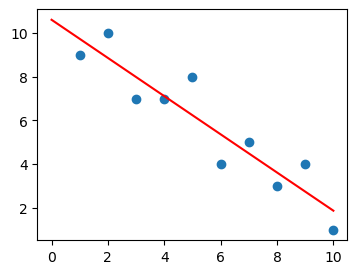

In [34]:
fig, ax = plt.subplots(figsize=(4,3), num=1)
ax.scatter(ds_gio_choi_game, ds_diem_thi)
x1,x2 = 0,10
y1,y2 = a*x1 + b, a*x2 + b
ax.plot([x1,x2], [y1,y2], color="red")
plt.show()